In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import pyterrier as pt
if not pt.started():
  pt.init()

# Indexacion

In [117]:
# Le paso el path donde se encuentran mis documento ya en formato trec
files = pt.io.find_files("./Cisi_formateado/")
files

['./Cisi_formateado/Cisi.trec']

In [118]:
#Inicializamos un indexador, para eso hay que definirle con que tipo de coleccion trabajaremos
# Como trabajamos con indices tipo trec usaremos "TRECCollectionIndexer"
# Obligatoriamente debemos darle un path local, donde se guardaran los indices generados "./custom_trec_index"
indexer = pt.TRECCollectionIndexer("C:\/Users\/AngelPC\/Desktop\/RI\/Tps2024\/RI_2024\/tp2\/Punto9\/indiceTrec", verbose=True, overwrite=True)
indexref = indexer.index(files)

19:02:27.761 [main] WARN org.terrier.indexing.MultiDocumentFileCollection - trec.encoding is not set; resorting to platform default (windows-1252). Indexing may be platform dependent. Recommend trec.encoding=UTF-8


  0%|          | 0/1 [00:00<?, ?files/s]

19:02:28.667 [main] ERROR org.terrier.structures.indexing.Indexer - Could not rename index
java.io.IOException: Rename of index structure file 'C:\/Users\/AngelPC\/Desktop\/RI\/Tps2024\/RI_2024\/tp2\/Punto9\/indiceTrec/data_1.direct.bf' (exists) to 'C:\/Users\/AngelPC\/Desktop\/RI\/Tps2024\/RI_2024\/tp2\/Punto9\/indiceTrec/data.direct.bf' (exists) failed - likely that source file is still open. Possible indexing bug?
	at org.terrier.structures.IndexUtil.renameIndex(IndexUtil.java:379)
	at org.terrier.structures.indexing.Indexer.index(Indexer.java:388)


2files [00:00,  2.21files/s]            


In [119]:
# load the index
index = pt.IndexFactory.of(indexref)

In [120]:
# Usar la función read_topics para leer el archivo de consultas
consultas_con_frecs = pt.io.read_topics("./results/q_Cisi_frecs.trec")
consultas_sin_frecs = pt.io.read_topics("./results/q_Cisi_no_frecs.trec")
# Usar la función read_qrels para leer el archivo de juicios de relevancia
qrels = pt.io.read_qrels("./results/qrels")

19:02:28.706 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8
19:02:28.716 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


In [121]:
consultas_con_frecs

,qid,query
0,1,problems concerns making descriptive titles di...
1,2,actually pertinent data opposed references ent...
2,3,information science definitions possible
3,4,image recognition methods automatically transf...
4,5,special training ordinary researchers business...
...,...,...
107,108,program machinemediated searching toliver d te...
108,109,author cocitation literature measure intellect...
109,110,progress documentation word processing introdu...
110,111,document clustering using inverted file approa...


In [122]:
qrels

,qid,docno,label
0,1,28,1
1,1,35,1
2,1,38,1
3,1,42,1
4,1,43,1
...,...,...,...
3109,111,422,1
3110,111,448,1
3111,111,485,1
3112,111,503,1


## Con Frecuencias TF-IDF

In [123]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
# Definir las métricas que deseas calcular (precisión, recall y P@X)
eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_tfidf = pt.Experiment(
    [tf_idf],
    consultas_con_frecs,
    qrels,
    eval_metrics=eval_metrics,
    names=["TF_IDF"]
)
resultados_tfidf

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,TF_IDF,76.0,65535.0,3114.0,2743.0,0.230075,0.257269,0.899449,0.672624,0.715474,...,0.015327,0.442105,0.360526,0.317544,0.290132,0.249123,0.153421,0.107763,0.061842,0.036092


In [124]:
# Mostrar Tabla de P@X
tabla = resultados_tfidf.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla

,P@X,Value
0,P_5,0.442105
1,P_10,0.360526
2,P_15,0.317544
3,P_20,0.290132
4,P_30,0.249123
5,P_100,0.153421
6,P_200,0.107763
7,P_500,0.061842
8,P_1000,0.036092


In [125]:
# Mostrar R–P en los 11 puntos standard
df_11puntos = resultados_tfidf.melt(value_vars=["iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos['Recall'] = df_11puntos['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos

,Recall,Precision
0,0.1,0.494026
1,0.2,0.384637
2,0.3,0.276709
3,0.4,0.230806
4,0.5,0.206150
5,0.6,0.170184
6,0.7,0.127931
7,0.8,0.093429
8,0.9,0.054718
9,1.0,0.015327


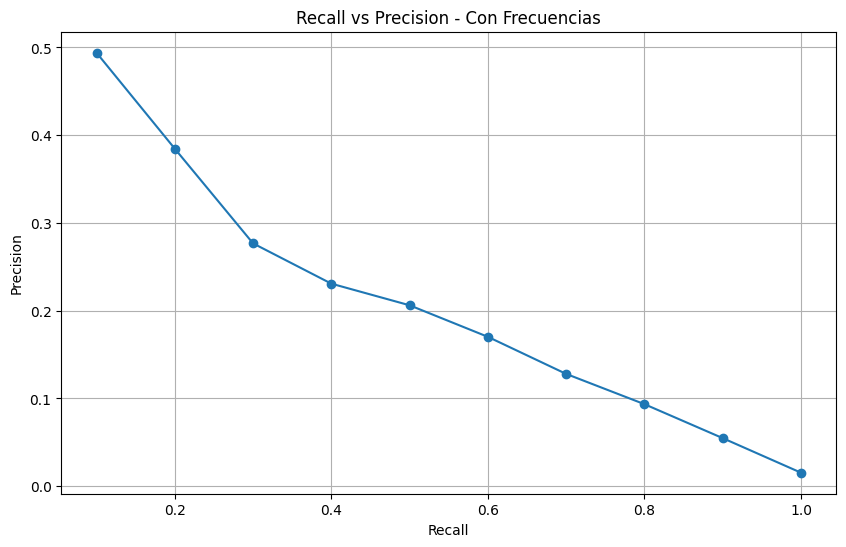

In [134]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos['Recall'], df_11puntos['Precision'], marker='o', linestyle='-')  # Graficar Recall vs Precision
plt.title('Recall vs Precision - Con Frecuencias')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.show()  # Mostrar el gráfico

## Sin Frecuencias TF-IDF

In [127]:
tf_idf = pt.BatchRetrieve(index, wmodel="TF_IDF")
# Definir las métricas que deseas calcular (precisión, recall y P@X)
eval_metrics = [
    "num_q", "num_ret", "num_rel", "num_rel_ret", "map", 
    "Rprec", "bpref", "recip_rank", "iprec_at_recall_0.00", 
    "iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
    "iprec_at_recall_1.00", "P_5", "P_10", "P_15", "P_20", "P_30", 
    "P_100", "P_200", "P_500", "P_1000"
]

# Ejecutar el experimento solo para el sistema TF-IDF
resultados_tfidf_sin_frecs = pt.Experiment(
    [tf_idf],
    consultas_sin_frecs,
    qrels,
    eval_metrics=eval_metrics,
    names=["TF_IDF"]
)
resultados_tfidf_sin_frecs

,name,num_q,num_ret,num_rel,num_rel_ret,map,Rprec,bpref,recip_rank,iprec_at_recall_0.00,...,iprec_at_recall_1.00,P_5,P_10,P_15,P_20,P_30,P_100,P_200,P_500,P_1000
0,TF_IDF,76.0,65535.0,3114.0,2730.0,0.187836,0.216855,0.894258,0.60071,0.633389,...,0.01347,0.357895,0.309211,0.292105,0.259211,0.226754,0.147368,0.105132,0.060711,0.035921


In [128]:
# Mostrar Tabla de P@X
tabla = resultados_tfidf_sin_frecs.melt(value_vars=["P_5", "P_10", "P_15", 
                                    "P_20", "P_30", "P_100", 
                                    "P_200", "P_500", "P_1000"], var_name="P@X", value_name="Value")
tabla

,P@X,Value
0,P_5,0.357895
1,P_10,0.309211
2,P_15,0.292105
3,P_20,0.259211
4,P_30,0.226754
5,P_100,0.147368
6,P_200,0.105132
7,P_500,0.060711
8,P_1000,0.035921


In [129]:
# Mostrar R–P en los 11 puntos standard
df_11puntos_sin_frec = resultados_tfidf_sin_frecs.melt(value_vars=["iprec_at_recall_0.10", "iprec_at_recall_0.20", "iprec_at_recall_0.30", 
                                    "iprec_at_recall_0.40", "iprec_at_recall_0.50", "iprec_at_recall_0.60", 
                                    "iprec_at_recall_0.70", "iprec_at_recall_0.80", "iprec_at_recall_0.90", 
                                    "iprec_at_recall_1.00"], var_name="Recall", value_name="Precision")
# Modificar los valores de recall
df_11puntos_sin_frec['Recall'] = df_11puntos_sin_frec['Recall'].apply(lambda x: float(x.split('_')[-1]))

df_11puntos_sin_frec

,Recall,Precision
0,0.1,0.403053
1,0.2,0.307878
2,0.3,0.229914
3,0.4,0.187964
4,0.5,0.164513
5,0.6,0.141030
6,0.7,0.096709
7,0.8,0.072275
8,0.9,0.039346
9,1.0,0.013470


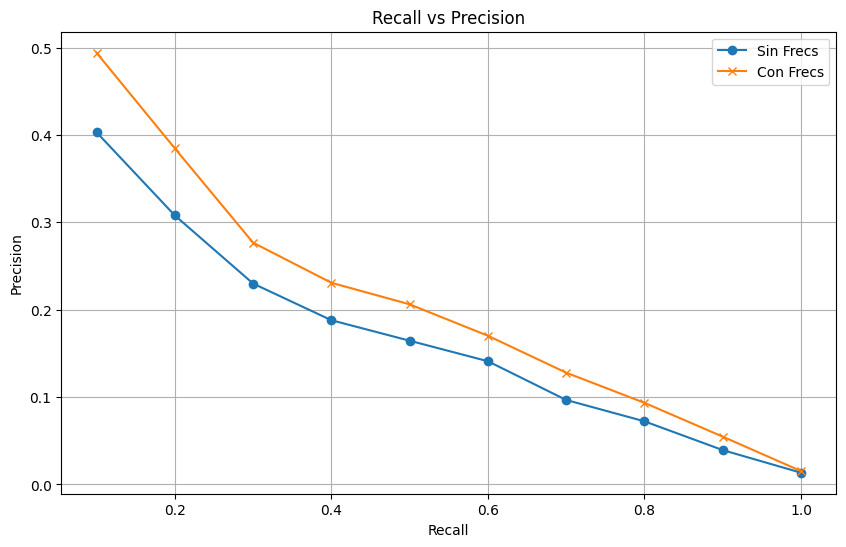

In [130]:
# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(df_11puntos_sin_frec['Recall'], df_11puntos_sin_frec['Precision'], marker='o', linestyle='-', label='Sin Frecs')  # Graficar la primera línea
plt.plot(df_11puntos['Recall'], df_11puntos['Precision'], marker='x', linestyle='-', label='Con Frecs')  # Graficar la segunda línea
plt.title('Recall vs Precision')  # Establecer el título del gráfico
plt.xlabel('Recall')  # Etiqueta del eje x
plt.ylabel('Precision')  # Etiqueta del eje y
plt.grid(True)  # Activar la cuadrícula en el gráfico
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar el gráfico